In [102]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import csv
import math
from collections import Counter
import matplotlib.pyplot as plt

s=pd.read_csv('../Data/2019/2019_LDA.csv',encoding='utf-8')

(126268, 31200)


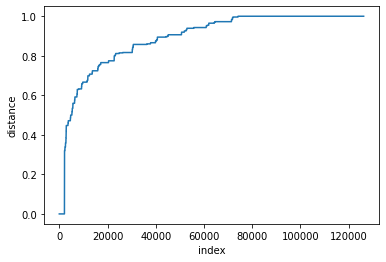

In [103]:
news_topic = s['topics'].tolist()

# # CountVectrizer로 토큰화
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(news_topic)
print(X.shape)
X = normalize(X)

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlabel('index')
plt.ylabel('distance')
plt.plot(distances)

In [104]:
m = DBSCAN(eps=0.8, min_samples = 20)
db_clusters = m.fit(X)

labels = m.labels_
s['labels'] = labels

hot_topic_index = Counter(s['labels']).most_common()
hot_topic = dict(hot_topic_index)

print(hot_topic)

{-1: 124510, 0: 1301, 10: 125, 12: 58, 3: 43, 5: 41, 1: 32, 6: 28, 11: 24, 9: 23, 4: 22, 7: 21, 2: 20, 8: 20}


In [105]:
index = []
for row in s['labels']:
    index.append(hot_topic[row])

s['cnt'] = index
len(s)
s = s[s['labels'] != -1]
s.sort_values(by='cnt', ascending=False).to_csv('./2021_Data/201906_DBSCAN.csv', index=False, header=True, encoding="utf-8-sig")